# Cluster class ratios

In [14]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

In [1]:
INPUT_PATH = '../../data/combined/clustered/final/Galson_2015a.parquet'
OUTPUT_PATH = '../../data/targets_data/clusters/Galson_2015a.parquet'

## Load data

In [2]:
import pandas as pd

data = pd.read_parquet(INPUT_PATH)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14738476 entries, 0 to 24
Data columns (total 26 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   num_errors     object
 1   redundancy     int64 
 2   name           int64 
 3   seq            object
 4   v              object
 5   cdr3           object
 6   original_name  object
 7   errors         object
 8   j              object
 9   data           object
 10  Longitudinal   object
 11  Chain          object
 12  Author         object
 13  Isotype        object
 14  Age            object
 15  Size_igblastn  int64 
 16  Disease        object
 17  Link           object
 18  BSource        object
 19  BType          object
 20  Size           int64 
 21  Species        object
 22  Vaccine        object
 23  Subject        object
 24  cdr3_len       int64 
 25  Cluster_ID     int64 
dtypes: int64(6), object(20)
memory usage: 3.0+ GB


,num_errors,redundancy,name,seq,v,cdr3,original_name,errors,j,data,...,Disease,Link,BSource,BType,Size,Species,Vaccine,Subject,cdr3_len,Cluster_ID
0,2,1,25814,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,127395,"[('70', 'Q'), ('103', 'L')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
1,1,8,29478,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,125855,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
2,1,12,31543,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,109459,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
3,1,1,38523,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGLDH,128305,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
4,1,1,50198,SVRVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,125829,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1


In [3]:
from bin.build_clustered_data import CLUSTER_ID_COLUMN_NAME

clusters_gr = data.groupby(CLUSTER_ID_COLUMN_NAME)

In [4]:
HEBP_TYPE = 'HepB+B-cells'

clusters_specif = clusters_gr.apply(lambda gr: (gr['BType'] == HEBP_TYPE).sum() / len(gr))

## Inspect class ratios

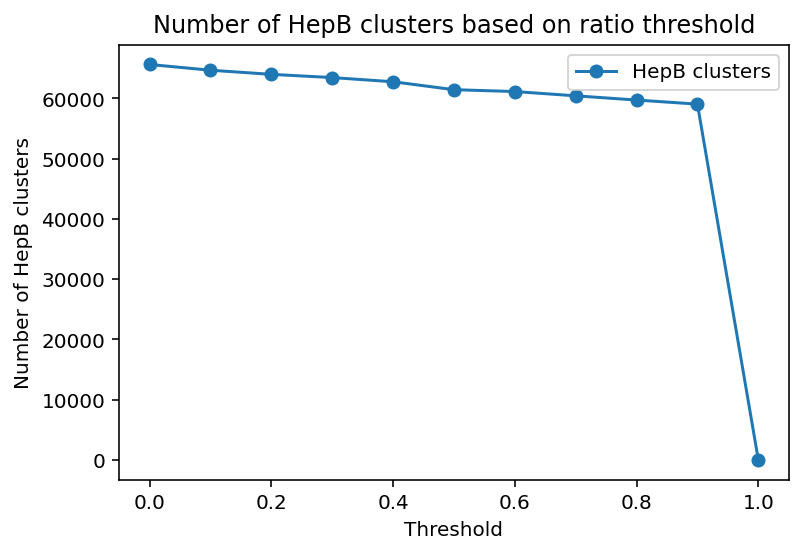

In [16]:
import numpy as np

thresholds = np.arange(0.0, 1.1, 0.1)
hepb_clusters_cnts = [(clusters_specif > hepb_specif_threshold).sum() for hepb_specif_threshold in thresholds]

ax = pd.DataFrame({'Threshold': thresholds, 'HepB clusters': hepb_clusters_cnts}).plot.line(x='Threshold', y='HepB clusters', style='-o')
ax.set(title='Number of HepB clusters based on ratio threshold', ylabel='Number of HepB clusters');